In [ ]:
!pip install medmnist opencv-python
aaaaaaaaaaaaaaaaaaaa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

In [ ]:
import medmnist
from medmnist import ChestMNIST  # Você pode escolher outro conjunto de dados, se necessário
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Para exibição no Colab


In [ ]:
# Definir a versão do dataset
data_flag = "chestmnist"  # Pode ser alterado para outro dataset, como 'pathmnist', 'dermamnist', etc.
download = True

# Carregar os dados
dataset = ChestMNIST(split="test", download=download)


100%|██████████| 82.8M/82.8M [01:48<00:00, 760kB/s]


In [ ]:

def add_salt_pepper_noise(image, amount, salt_vs_pepper=0.5):
    noisy = image.copy()

    # Quantidade total de pixels a serem afetados
    total_pixels = image.size
    num_salt = int(amount * total_pixels * salt_vs_pepper)
    num_pepper = int(amount * total_pixels * (1.0 - salt_vs_pepper))

    # Salt (255)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[tuple(coords)] = 255

    # Pepper (0)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[tuple(coords)] = 0

    return noisy


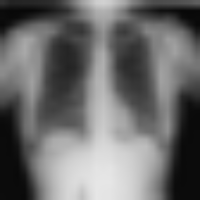

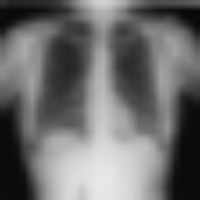

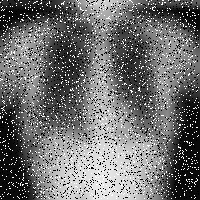

In [ ]:
new_size = (200, 200)
img1 = dataset.imgs[4]
img = dataset.imgs[4]

img = ((1 - img) * 255).astype(np.uint8)
img = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)
img_resized1 = cv2.resize(img1, new_size, interpolation=cv2.INTER_LINEAR)

cv2_imshow(img_resized)
cv2_imshow(img_resized1)

img = add_salt_pepper_noise(img, amount=0.2)  # 5% de ruído
cv2_imshow(img)




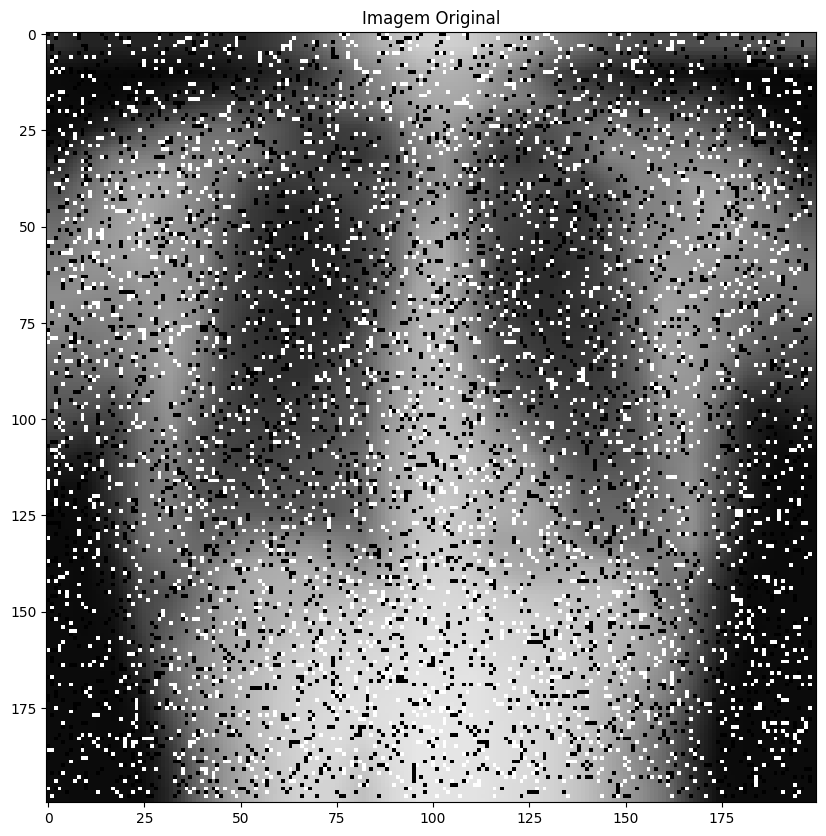

In [ ]:
#Imagem original
figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()

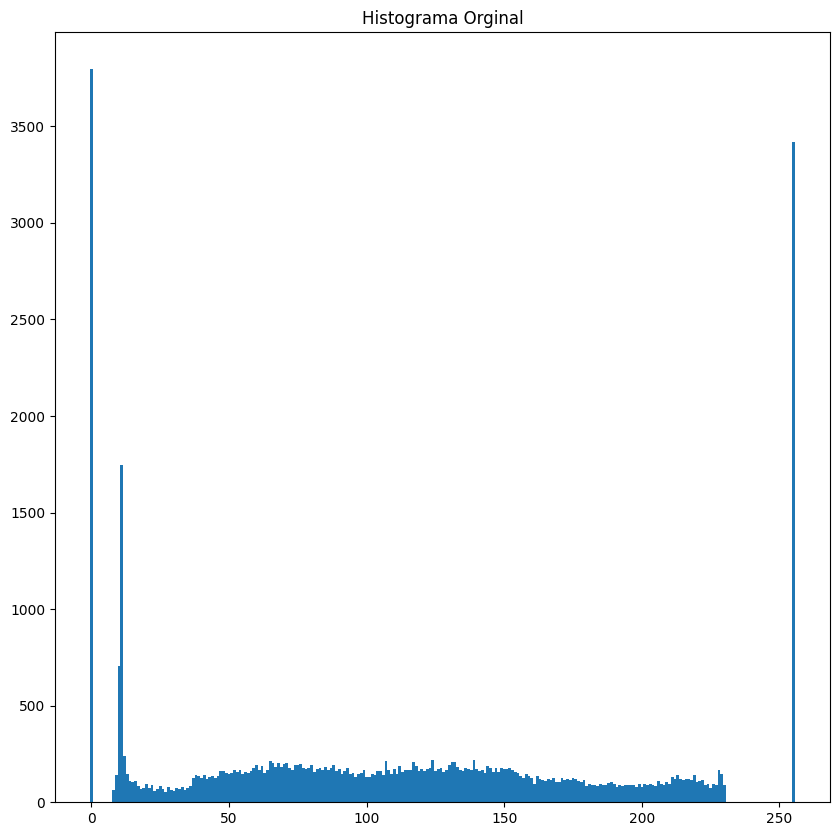

In [ ]:
#Histograma original
intervalo_min_max = [0, 256]
num_pontos = 256
point_count, point_edges = np.histogram(img, num_pontos, intervalo_min_max)
point_start = point_edges[:-1]

def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # por que não usar plt.hist? porque queremos traçar também algumas derivações desse histograma
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(point_start, point_count)
plt.title("Histograma Orginal")
plt.show()

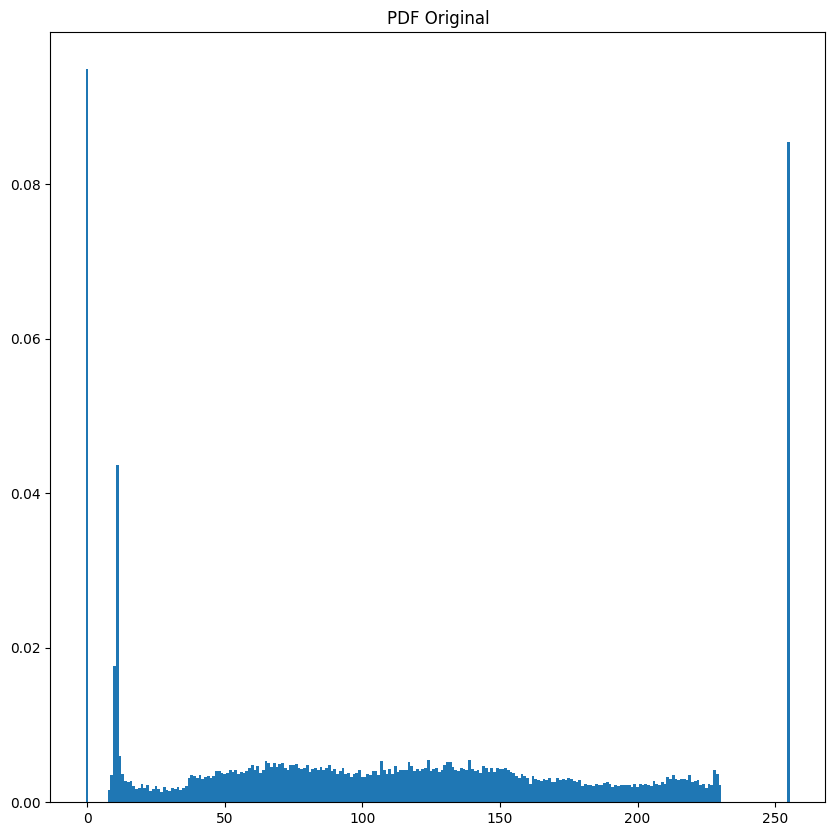

In [ ]:
#Normalizamos o histograma
pdf = point_count / np.sum(point_count)

draw_hist(point_start, pdf)
plt.title("PDF Original")
plt.show()

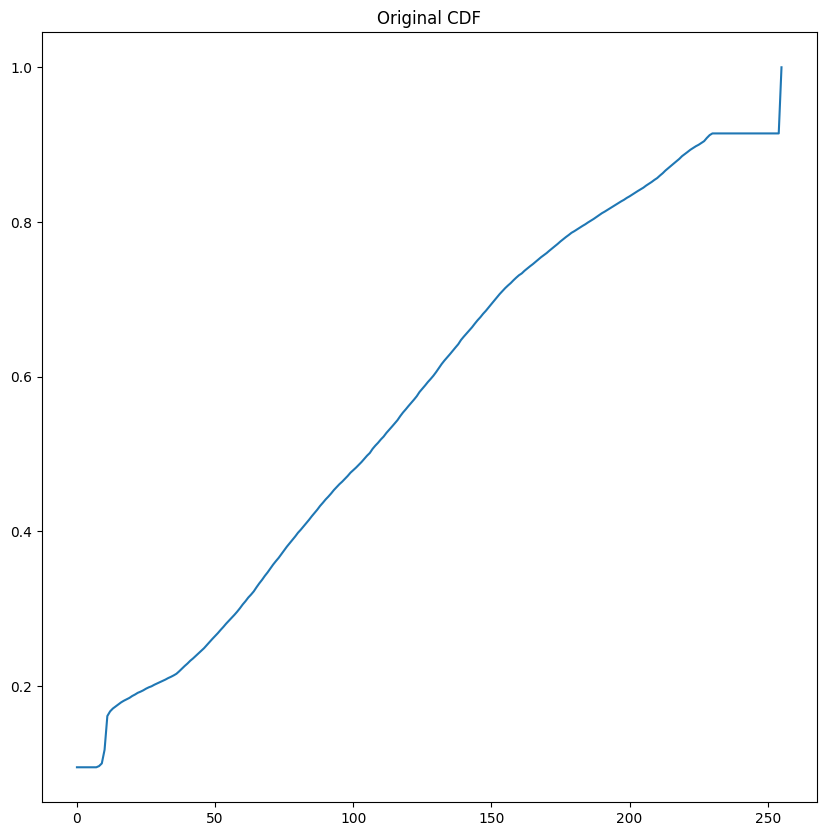

In [ ]:
#Obtemos o CDF (Função densidaade cumulativa)
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()

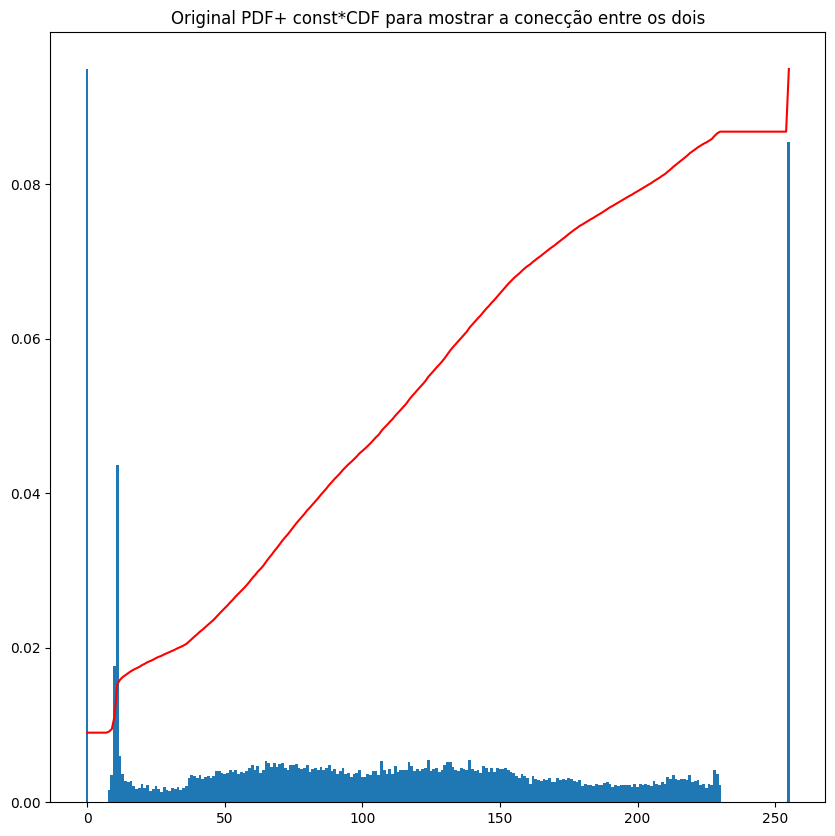

In [ ]:
fig, ax = draw_hist(point_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF para mostrar a conecção entre os dois")
plt.show()

In [ ]:
#Desnormalizando para tornar função de equalização
f_eq = np.round(cdf * 255).astype(int)
f_eq

array([ 24,  24,  24,  24,  24,  24,  24,  24,  25,  25,  30,  41,  43,
        44,  44,  45,  46,  46,  47,  47,  48,  48,  49,  49,  50,  50,
        51,  51,  51,  52,  52,  53,  53,  54,  54,  54,  55,  56,  57,
        58,  58,  59,  60,  61,  62,  63,  63,  65,  66,  67,  67,  68,
        69,  70,  72,  73,  74,  74,  76,  77,  78,  79,  80,  81,  82,
        84,  85,  86,  87,  88,  90,  91,  92,  93,  94,  96,  97,  98,
        99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113,
       113, 114, 116, 117, 118, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153,
       155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 186, 187, 188, 189, 189, 190, 191, 192, 192,
       193, 194, 195, 195, 196, 197, 198, 198, 199, 200, 200, 20

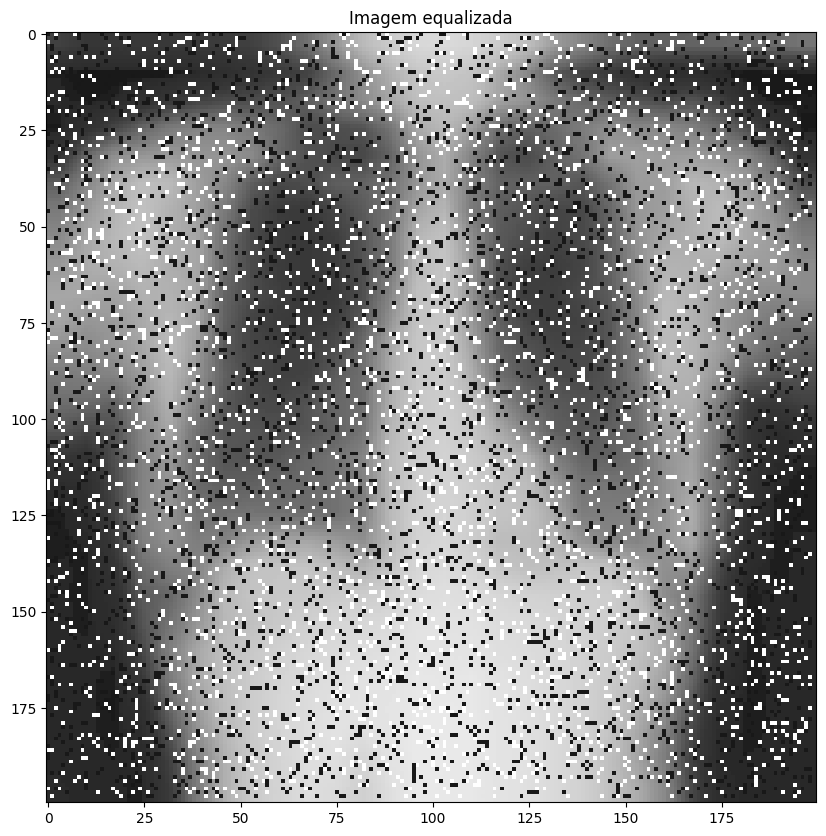

In [ ]:
#Usando função equalizada para plotar imagem equalizada
img_eq = f_eq[img]

plt.figure(figsize=figsize)
plt.imshow(img_eq, cmap="gray", vmin=0, vmax=255)
plt.title("Imagem equalizada")
plt.show()

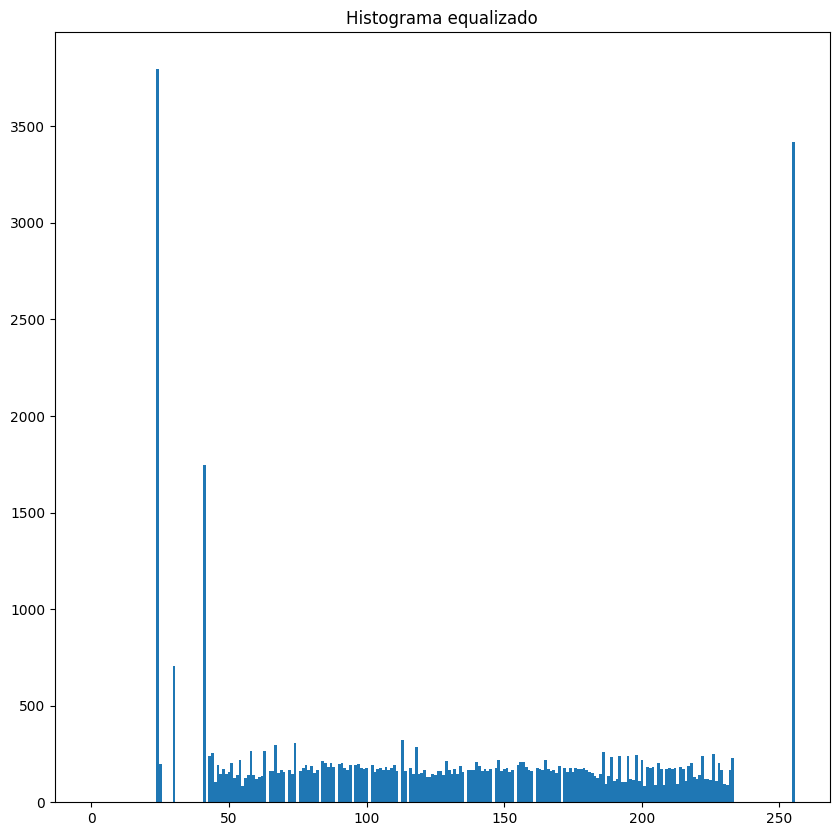

In [ ]:
#Histograma equalizado
bin_count, bins_edges = np.histogram(img_eq, num_pontos, intervalo_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("Histograma equalizado")
plt.show()

255


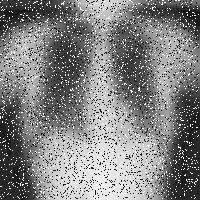

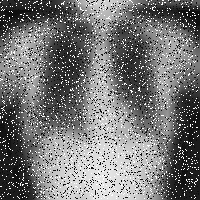

In [ ]:
#gamma
img_in = img_eq

c = 1 #255/(np.log(1 + np.max(img_eq)))
gamma = 1.2
#img_out = np.array(c*255**(img_in/255) ** gamma, dtype = np.uint8)
img_out = np.array(c*255*(img_in/255)**gamma, dtype = np.uint8)

print(img_out.max())

cv2_imshow(img_in)
cv2_imshow(img_out)

In [ ]:
def gauss_create(sigma=1, size_x=3, size_y=3):
    '''
    Create normal (gaussian) distribuiton
    '''
    x, y = np.meshgrid(np.linspace(-1,1,size_x), np.linspace(-1,1,size_y))
    calc = 1/((2*np.pi*(sigma**2)))
    exp = np.exp(-(((x**2) + (y**2))/(2*(sigma**2))))

    return exp*calc

In [ ]:
def add_padding(img, padding_height, padding_width):
    n, m = img.shape

    padded_img = np.zeros((n + padding_height * 2, m + padding_width * 2))
    padded_img[padding_height : n + padding_height, padding_width : m + padding_width] = img

    return padded_img

In [ ]:
def bubble_sort(arr):

    # Outer loop to iterate through the list n times
    for n in range(len(arr) - 1, 0, -1):

        # Inner loop to compare adjacent elements
        for i in range(n):
            if arr[i] > arr[i + 1]:

                # Swap elements if they are in the wrong order
                swapped = True
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
    return arr

In [ ]:
def conv2d(img, kernel, padding=True):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape  # Atribui valor à variável k_height, k_width

    # Get dimensions of the image
    img_height, img_width = img.shape  # Atribui valor à variável img_height, img_width

    # Calculate padding required
    pad_height = k_height // 2  # Atribui valor à variável pad_height
    pad_width = k_width // 2  # Atribui valor à variável pad_width

    # Create a padded version of the image to handle edges
    if padding == True:
        padded_img = add_padding(img, pad_height, pad_width)  # Atribui valor à variável padded_img

    #print(padded_img)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)  # Atribui valor à variável output

    # Perform convolution
    for i_img in range(img_height):  # Loop usando i
        for j_img in range(img_width):  # Loop usando j
            for i_kernel in range(k_height):
                for j_kernel in range(k_width):
                    output[i_img, j_img] = output[i_img, j_img] + (padded_img[i_img+i_kernel, j_img+j_kernel] * kernel[i_kernel, j_kernel])  # Atribui valor à variável output[i, j]
            output[i_img, j_img] = int(output[i_img, j_img])

    return np.array(output, dtype=np.uint8)

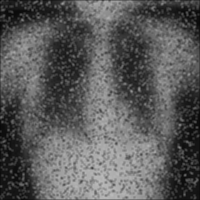

[[15 42 57 ... 57 57 41]
 [45 57 53 ... 73 78 57]
 [59 53 33 ... 65 78 57]
 ...
 [52 57 48 ... 21 22 16]
 [39 59 45 ... 22 22 16]
 [25 39 30 ... 16 16 12]]


In [ ]:

#gaussiano
gaus_3x3 = gauss_create(sigma=1, size_x=3, size_y=3)
gaus_5x5 = gauss_create(sigma=1, size_x=5, size_y=5)
gaus_7x7 = gauss_create(sigma=1, size_x=7, size_y=7)

img_mean = conv2d(img_out, gaus_3x3)
conv_opencv = cv2.filter2D(src=img_out, ddepth=-1, kernel=gaus_3x3, borderType=cv2.BORDER_CONSTANT)
cv2_imshow(img_mean)
print(conv_opencv)